## Introduction

This notebook is used to analyze the [prepated data](https://github.com/lbomine/Seattle-Weather/blob/40d31983d4a0db95c2c1dff7139f7d154feef44e/Seattle_St.%20Louis_Data_Preparation.ipynb) originally obtained by the National Centers for Environmental Information NOAA Climate Data Online  [search tool](https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND). We will determine whether it rains more in Seattle, WA than in St. Louis, MO.

## Import libraries

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno
import calendar

## Load the clean data

In [68]:
df = pd.read_csv('https://raw.githubusercontent.com/lbomine/Seattle-Weather/main/clean_seattle_stl_weather.csv') #add data set here

## Explore the contents of the data sets

Review the content of the data set.

In [69]:
df

,date,city,precipitation,day_of_year,month,year,rained
0,2018-01-01,STL,0.00,1,1,2018,False
1,2018-01-02,STL,0.00,2,1,2018,False
2,2018-01-03,STL,0.00,3,1,2018,False
3,2018-01-04,STL,0.00,4,1,2018,False
4,2018-01-05,STL,0.00,5,1,2018,False
...,...,...,...,...,...,...,...
3647,2022-12-27,SEA,0.78,361,12,2022,True
3648,2022-12-28,SEA,0.40,362,12,2022,True
3649,2022-12-29,SEA,0.03,363,12,2022,True
3650,2022-12-30,SEA,0.62,364,12,2022,True


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           3652 non-null   object 
 1   city           3652 non-null   object 
 2   precipitation  3652 non-null   float64
 3   day_of_year    3652 non-null   int64  
 4   month          3652 non-null   int64  
 5   year           3652 non-null   int64  
 6   rained         3652 non-null   bool   
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 174.9+ KB


## State your questions

The domain problem is to compare how much it rains in Seattle and St. Louis. Questions were proposed to assist our understanding and interpretation of the data.

1. Did the mean precipitation in Seattle and St. Louis change over the years? If so, how did it change and do they differ from eachother?
2. How many days of rain does Seattle have in comparison to St. Louis? Which city has more days of rain?

## Analysis

While preparing the data I came across the abstract issue with the definition of "rains more." The data set contains precipitation values that show the total inches rain each day from 2018 to 2022. The definition of "rains more" could be measured in two different ways: 
  1. Amount of rain.
  2. Days of rain.

Without creating bias in my analysis, I decided to create plots that fell under both definitions of "rains more." The first is to graph the mean precipitation in Seattle and St. Louis from 2018 to 2022. Then, I will graph the total days of rain for each city. To answer the proposed questions I will compare Seattle and St. Louis and see which definition, as stated above, they represent.

### Mean Precipitation

Creating a plot for the mean precipitation by city.

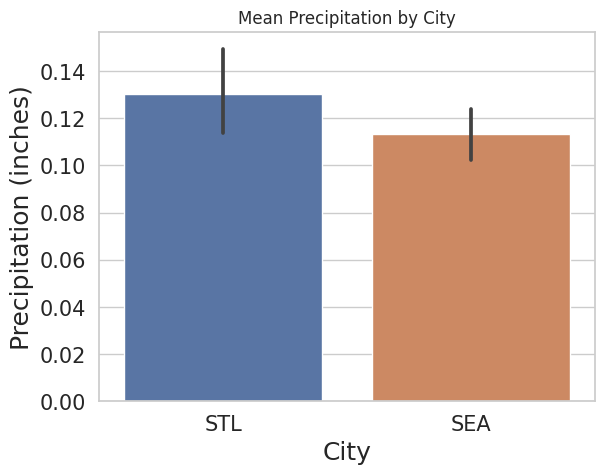

In [71]:
sns.barplot(data=df, x='city', y='precipitation')
plt.title('Mean Precipitation by City')
plt.xlabel('City', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)
plt.tick_params(labelsize=15);

From comparing the mean we see that on average, St. Louis has more inches of rain than Seattle.

Creating another plot to emphasize the difference between St. Louis and Seattle's mean precipitation by month.

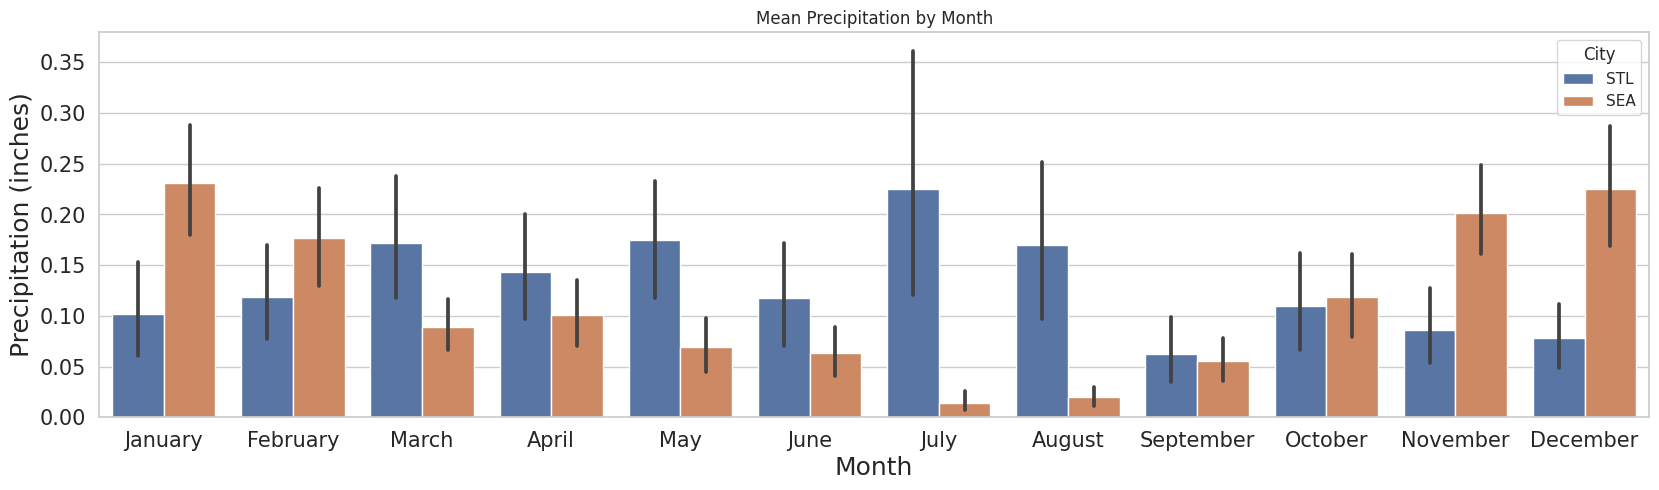

In [72]:
plt.figure(figsize=(20,5))
hue_order = ['STL', 'SEA']
sns.barplot(data=df, x='month', y='precipitation', hue='city', hue_order=hue_order)
plt.title('Mean Precipitation by Month')
plt.xlabel('Month', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)
plt.legend(loc='upper right', title='City')
plt.xticks(ticks=range(12), labels=[calendar.month_name[i+1] for i in range(12)])
plt.tick_params(labelsize=15);

Following this graph, Seattle has less precipitation in seven out of the twelve months compared to St. Louis. Overall, St. Louis has more precipitation compared to Seattle. In July, St. Louis has a large error bar showing that there is an outlier. Thus, the mean precipitation may not be completely accurate due to the outlier.

### Total Days of Rain

Create a graph that counts the amount of days it rained in each city.

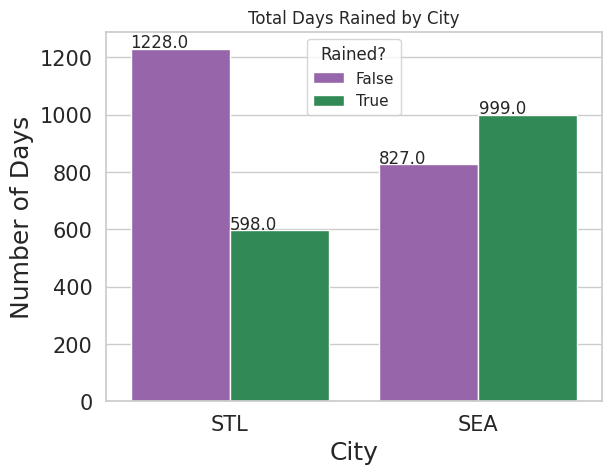

In [73]:
g = sns.countplot(data=df, x='city', hue='rained', palette=['#9B59B6','#229954'])
plt.title('Total Days Rained by City')
plt.xlabel('City', fontsize=18)
plt.ylabel('Number of Days', fontsize=18)
plt.legend(loc='upper center', title='Rained?')
plt.tick_params(labelsize=15);

# add counts to bars
for p in g.patches:
    g.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

Seattle had 999 days of rain whereas St. Louis only had 598 days of rain. The total days it did not rain in St. Louis is much greater than the days it did rain in St. Louis. Seattle rained on more days but, the difference between rain and no rain is smaller than St. Louis.

Create and graph new data frame to compare the total days it rained per month in each city.

In [74]:
df_rain = df.groupby(['city', 'month', 'rained'])
rainy_days = df_rain.rained.sum().reset_index(name='rainy_days')
rainy_days = rainy_days[rainy_days['rained'] == True]

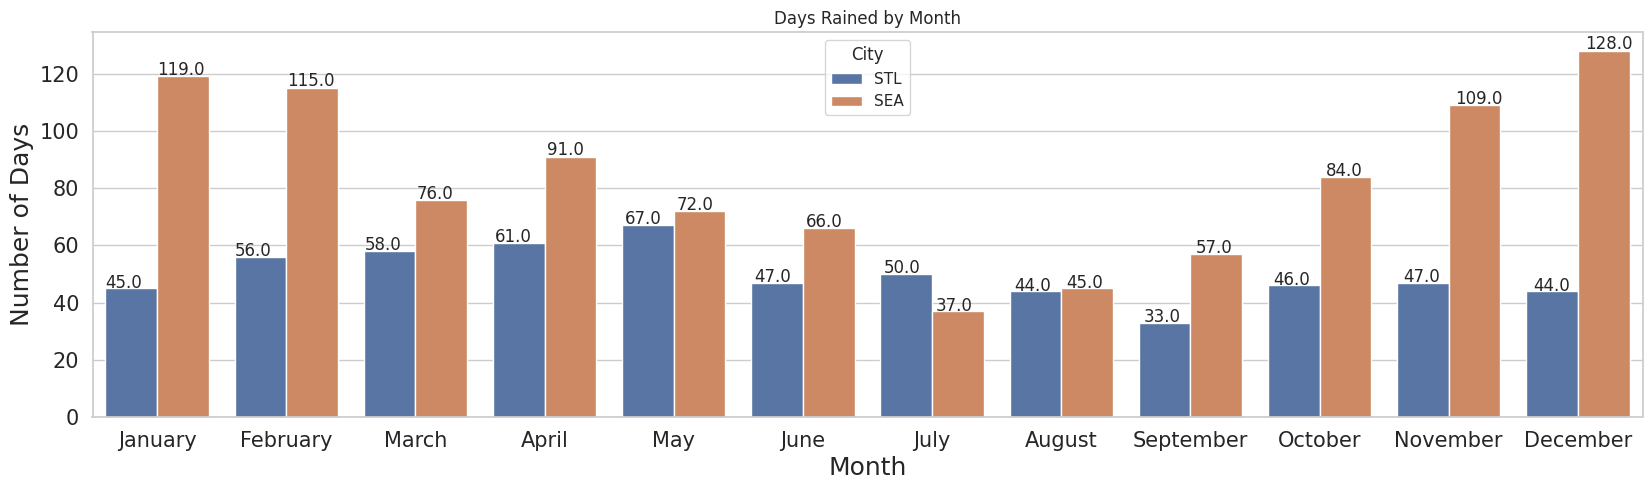

In [75]:
plt.figure(figsize=(20,5))
hue_order = ['STL', 'SEA']
g = sns.barplot(data=rainy_days, x='month', y='rainy_days', hue='city', hue_order=hue_order)
plt.xticks(ticks=range(12), labels=[calendar.month_name[i+1] for i in range(12)])
plt.title('Days Rained by Month')
plt.xlabel('Month', fontsize=18)
plt.ylabel('Number of Days', fontsize=18)
plt.legend(loc='upper center', title='City')
plt.tick_params(labelsize=15);

# add counts to bars
for p in g.patches:
    g.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

Following this graph, we see that Seattle has more days of rain in eleven out of twelve months. Thus, Seattle has more days of rain compared to St. Louis.

## Results


Our original problem was to determine whether it rains more in Seattle, WA than in St. Louis, MO. To answer this I created graphs that represent the different categories of "more rain."
  1. Amount of rain.
  2. Days of rain.

The first set of graphs were used to find the mean precipitation (inches) for each city. This provided a visualization of the average amount of rain per month in each city. From the output I was able to find that St. Louis had more precipitation on the days it rained in 2018-2022. The second set of graphs were used to calculate the total days of rain for each city. This provided a visual for the frequency of rain in each city. Notably, Seattle had more days of rain in 2018-2022.

## Conclusion

Through my data analysis, I found that St. Louis had more precipitation than Seattle in 2018-2022. Seattle had a lower average of precipitation but, had more days of rain throughout the year. Both Seattle and St. Louis fall under one of the definitions that it "rains more." Thus, I conclude that St. Louis had more rain but Seattle had more days of rain in 2018-2022.